## Simulating Data

In [1]:
k.stores <- 20    # 20 stores, using "k." for "constant"
k.weeks <- 104    # 2 years of data each
# create a data frame of initially missing values to hold the data
store.df <- data.frame(matrix(NA, ncol=10, nrow=k.stores*k.weeks))
names(store.df) <- c("storeNum", "Year", "Week", "p1sales", "p2sales", 
                     "p1price", "p2price", "p1prom", "p2prom", "country")

In [2]:
store.num <- 101:(100+k.stores)
(store.cty <- c(rep("US", 3), rep("DE", 5), rep("GB", 3), rep("BR", 2),
                rep("JP", 4), rep("AU", 1), rep("CN", 2)))

[1] "US" "US" "US" "DE" "DE" "DE" "DE" "DE" "GB" "GB" "GB" "BR" "BR" "JP" "JP"
[16] "JP" "JP" "AU" "CN" "CN"

In [3]:
store.df$storeNum <- rep(store.num, each=k.weeks)
store.df$country  <- rep(store.cty, each=k.weeks)
rm(store.num, store.cty)

In [4]:
store.df$Week <- rep(1:52, times=k.stores*2)
store.df$Year  <- rep(rep(1:2, each=k.weeks/2), times=k.stores)

In [5]:
store.df$storeNum <- factor(store.df$storeNum)
store.df$country  <- factor(store.df$country)

In [6]:
set.seed(98250)

In [7]:
store.df$p1prom <- rbinom(n=nrow(store.df), size=1, p=0.1)
store.df$p2prom <- rbinom(n=nrow(store.df), size=1, p=0.15)

In [8]:
store.df$p1price <- sample(x=c(2.19, 2.29, 2.49, 2.79, 2.99),
                           size=nrow(store.df), replace=TRUE)
store.df$p2price <- sample(x=c(2.29, 2.49, 2.59, 2.99, 3.19),
                           size=nrow(store.df), replace=TRUE)

In [9]:
# sales data, using poisson (counts) distribution, rpois()
# first, the default sales in the absence of promotion
tmp.sales1 <- rpois(nrow(store.df), lambda=120)
tmp.sales2 <- rpois(nrow(store.df), lambda=100)

In [10]:
# scale sales according to the ratio of log(price)
tmp.sales1 <- tmp.sales1 * log(store.df$p2price) / log(store.df$p1price)
tmp.sales2 <- tmp.sales2 * log(store.df$p1price) / log(store.df$p2price)

In [11]:
# final sales get a 30% or 40% lift when promoted
store.df$p1sales <- floor(tmp.sales1 * (1 + store.df$p1prom*0.3))
store.df$p2sales <- floor(tmp.sales2 * (1 + store.df$p2prom*0.4))

In [13]:
# install.packages("car")   # if needed
library(car)
some(store.df, 10)

,storeNum,Year,Week,p1sales,p2sales,p1price,p2price,p1prom,p2prom,country
362,104,1,50,142,95,2.79,3.19,0,0,DE
395,104,2,31,108,97,2.99,3.19,0,0,DE
477,105,2,9,151,80,2.29,2.59,0,0,DE
682,107,2,6,96,99,2.49,2.29,0,0,DE
774,108,1,46,154,66,2.29,3.19,0,0,DE
775,108,1,47,132,154,2.49,2.29,1,1,DE
991,110,2,3,96,98,2.79,2.49,0,0,GB
1250,113,1,2,135,142,2.99,2.99,0,1,BR
1295,113,1,47,147,95,2.19,2.29,0,0,BR
1568,116,1,8,180,98,2.19,3.19,0,1,JP


In [ ]:
library(psych)
describe(store.df)

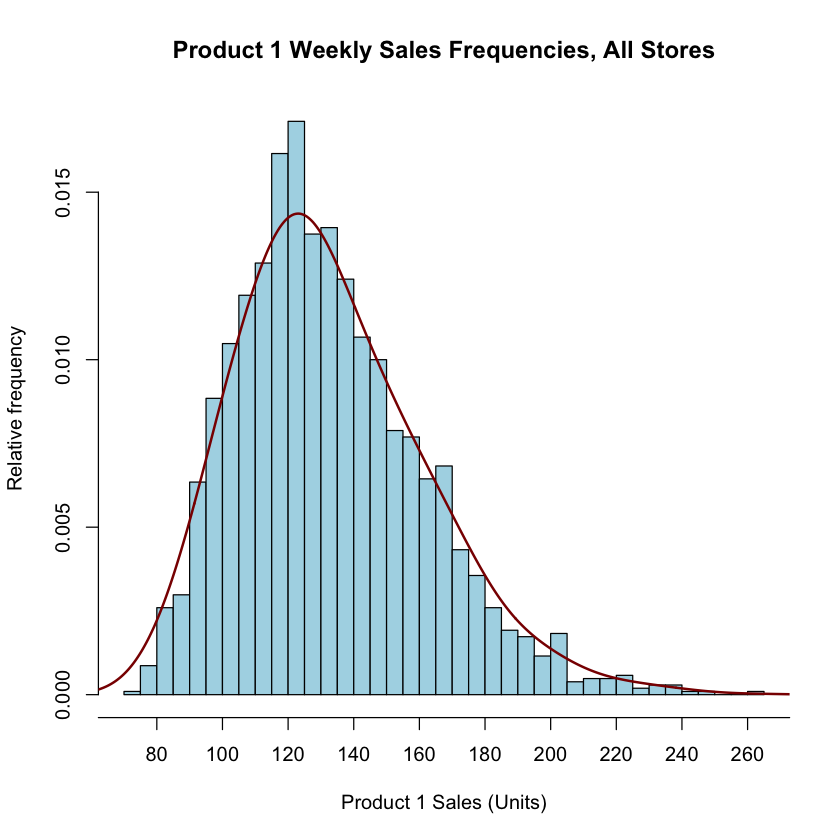

In [16]:
hist(store.df$p1sales, main="Product 1 Weekly Sales Frequencies, All Stores",
      xlab="Product 1 Sales (Units)", ylab="Relative frequency", breaks=30,
      col="lightblue", freq=FALSE, xaxt="n")
axis(side=1, at=seq(60, 300, by=20))
lines(density(store.df$p1sales, bw=10),    # "bw= ..." adjusts the smoothing
      type="l", col="darkred", lwd=2)

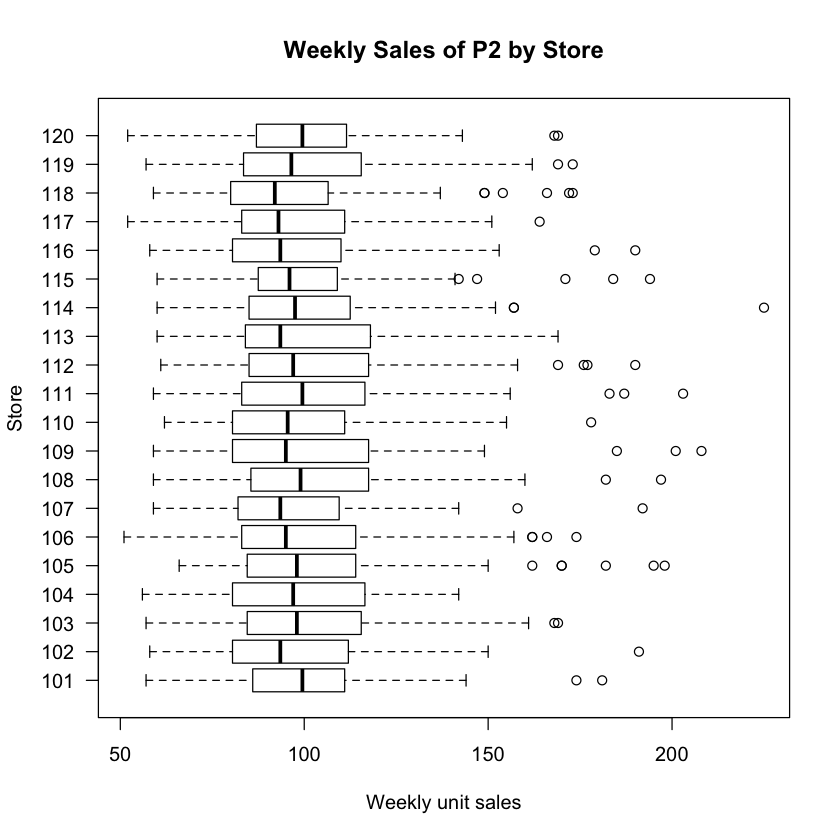

In [26]:
boxplot(store.df$p2sales ~ store.df$storeNum, horizontal=TRUE, 
        ylab="Store", xlab="Weekly unit sales", las=1,
        main="Weekly Sales of P2 by Store")

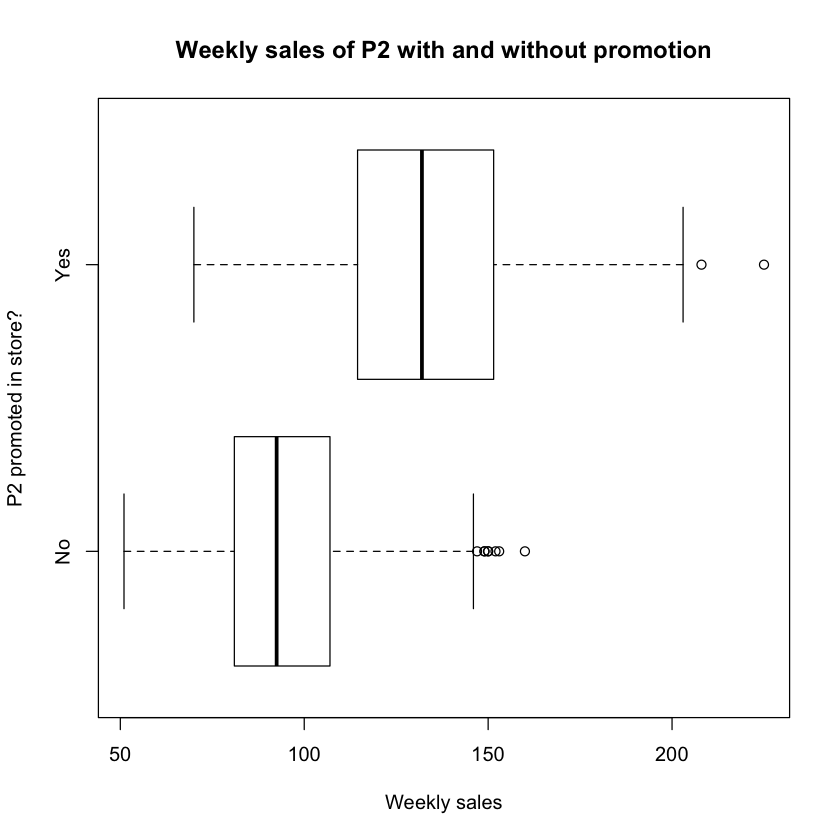

In [27]:
boxplot(p2sales ~ p2prom, data=store.df, horizontal=TRUE, yaxt="n",
        ylab="P2 promoted in store?", xlab="Weekly sales",
        main="Weekly sales of P2 with and without promotion")
axis(side=2, at=c(1,2), labels=c("No", "Yes"))

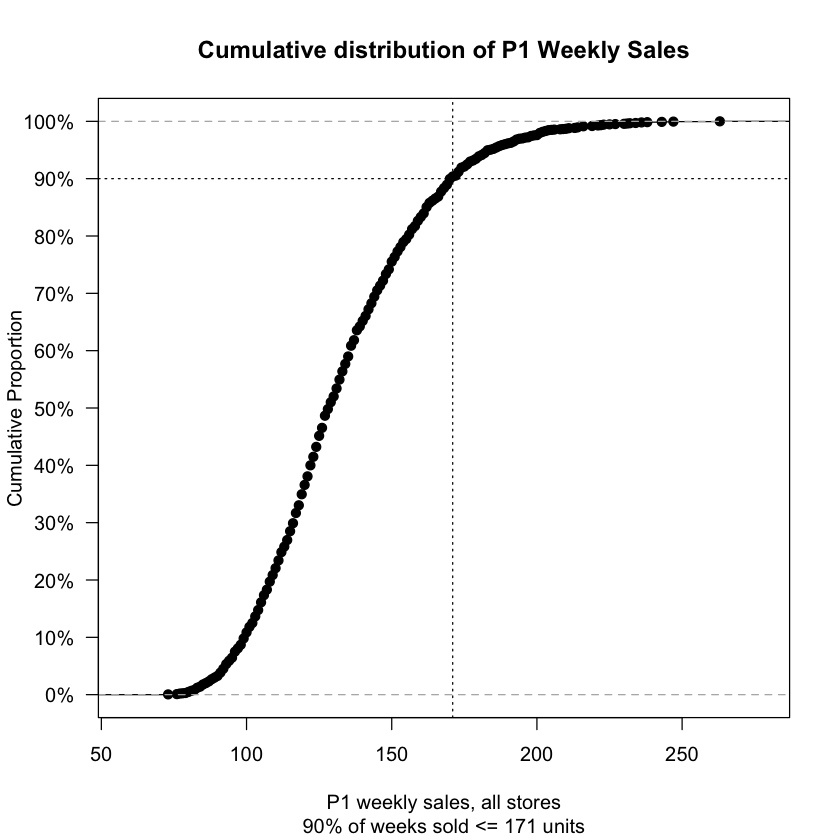

In [28]:
plot(ecdf(store.df$p1sales),
     main="Cumulative distribution of P1 Weekly Sales",
     ylab="Cumulative Proportion", 
     xlab=c("P1 weekly sales, all stores", "90% of weeks sold <= 171 units"),
     yaxt="n")
axis(side=2, at=seq(0, 1, by=0.1), las=1,
     labels=paste(seq(0,100,by=10), "%", sep=""))
abline(h=0.9, lty=3)           # "h=" for horizontal line; "lty=3" for dotted
abline(v=quantile(store.df$p1sales, pr=0.9), lty=3)  # "v=" for vertical line

In [30]:
aggregate(store.df$p1sales, by=list(country=store.df$country), sum)

,country,x
1,AU,14544
2,BR,27836
3,CN,27381
4,DE,68876
5,GB,40986
6,JP,55381
7,US,41737


In [31]:
by(store.df$p1sales, store.df$country, mean)

store.df$country: AU
[1] 139.8462
------------------------------------------------------------ 
store.df$country: BR
[1] 133.8269
------------------------------------------------------------ 
store.df$country: CN
[1] 131.6394
------------------------------------------------------------ 
store.df$country: DE
[1] 132.4538
------------------------------------------------------------ 
store.df$country: GB
[1] 131.3654
------------------------------------------------------------ 
store.df$country: JP
[1] 133.1274
------------------------------------------------------------ 
store.df$country: US
[1] 133.7724

In [34]:
library(rworldmap)
library(RColorBrewer)

Loading required package: sp
### Welcome to rworldmap ###
For a short introduction type : 	 vignette('rworldmap')


In [43]:
p1sales.sum = aggregate(store.df$p1sales, by=list(country=store.df$country), sum)

In [44]:
p1sales.map = joinCountryData2Map(plsales.sum, joinCode='ISO2', nameJoinColumn='country')

7 codes from your data successfully matched countries in the map
0 codes from your data failed to match with a country code in the map
235 codes from the map weren't represented in your data


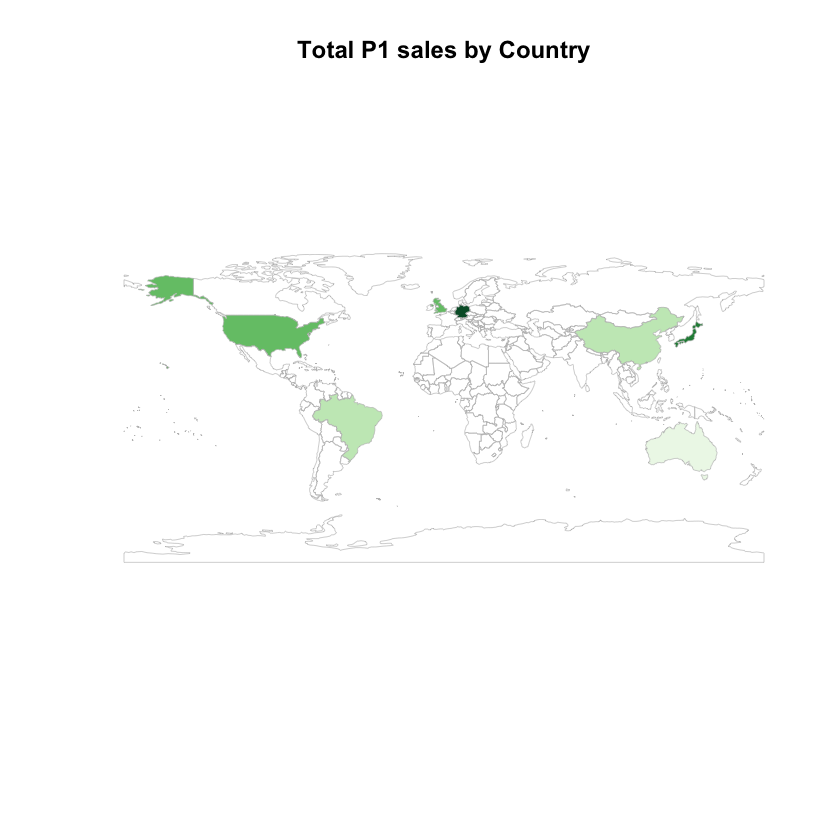

In [45]:
mapCountryData(p1sales.map, nameColumnToPlot="x", mapTitle="Total P1 sales by Country",
               colourPalette=brewer.pal(7, "Greens"), catMethod="fixedWidth", addLegend=FALSE)